## 🔄 정규화(Regularization) — 벌점 주는 코치
> “모델이 너무 똑똑해서 시험 문제를 외우면, 다음 시험에서 망한다.  
> 그래서 일부러 **과도하게 외우지 않게 벌점**을 주는 규칙.”

- 머신러닝에서 **정규화**는 모델이 배우는 숫자(가중치)가 너무 커지지 않게 제한
- 복잡성을 줄여서 새로운 데이터에도 잘 맞게 만드는 역할
- 📌 **효과**: 과적합(Overfitting) 방지

---

## 🏁 Baseline(베이스라인) — 첫 기록 세우기
> “마라톤 뛰기 전에 가볍게 조깅으로 실력 체크”

- 새로운 데이터셋을 받으면 복잡한 모델(XGBoost, 딥러닝) 대신
  **간단한 모델(Ridge, Lasso)**로 먼저 성능을 측정
- 이 기록이 **출발선**이 됨
- 이후 더 성능이 좋아지면 모델 업그레이드 성공,  
  아니라면 데이터 자체를 다시 점검해야 함

---

## 🎯 Ridge / Lasso / ElasticNet — 코치 스타일 비교

| 모델 | 규제 방식 | 성격 | 비유 |
|------|----------|------|------|
| **🏋️ Ridge** | L2 규제 (가중치 **제곱** 벌점) | 모든 변수를 조금씩 줄임 | 모든 부원에게 **살짝 다이어트** 시키는 코치 |
| **✂️ Lasso** | L1 규제 (가중치 **절댓값** 벌점) | 필요 없는 변수는 0으로 만듦 | 실력 없는 부원은 **아예 방출**하는 코치 |
| **⚖️ ElasticNet** | L1 + L2 혼합 | 0도 만들고, 안정성도 챙김 | **다이어트 + 방출** 둘 다 적당히 쓰는 코치 |

---

## 💡 기억법
- **Ridge** → "모두 조금씩 줄임" → **다이어트형 코치**
- **Lasso** → "몇 명은 아예 0으로" → **방출형 코치**
- **ElasticNet** → "둘 다 적당히" → **균형형 코치**

---


▶ 데이터 로드: seaborn 'diamonds'
   - shape: (53940, 10)
▶ 데이터 분할: train (43152, 9), test (10788, 9)
▶ 모델 학습 & 평가 진행
   - Ridge      | MSE: 1,288,659.50 | RMSE: 1,135.19 | MAE: 736.71 | R²: 0.9189
   - Lasso      | MSE: 1,288,548.99 | RMSE: 1,135.14 | MAE: 736.58 | R²: 0.9189
   - ElasticNet | MSE: 1,922,507.38 | RMSE: 1,386.55 | MAE: 928.67 | R²: 0.8791

▶ 성능 요약표


,Model,MSE,RMSE,MAE,R2
1,Lasso,1.288549e+06,1135.142720,736.583435,0.918943
0,Ridge,1.288660e+06,1135.191395,736.711816,0.918936
2,ElasticNet,1.922507e+06,1386.545122,928.673047,0.879063


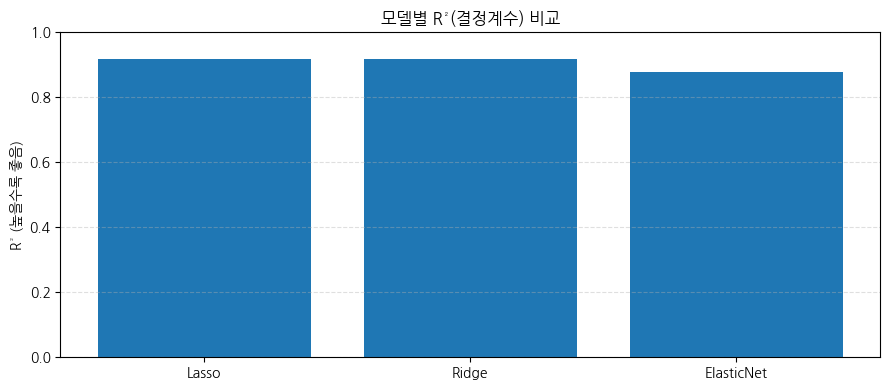

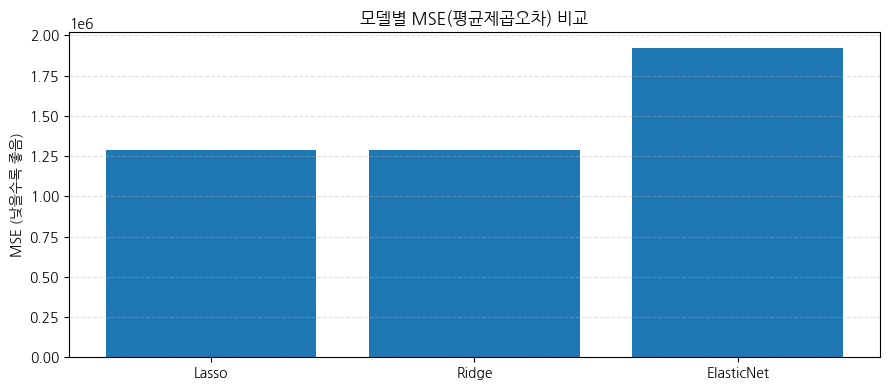


▶ Lasso에서 0이 된 계수 개수: 0/23


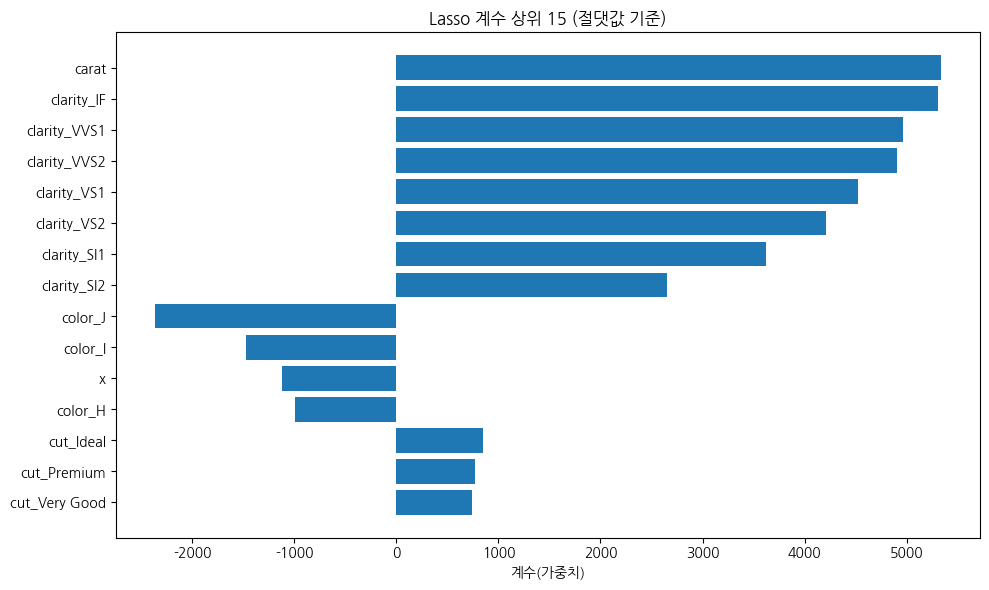

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

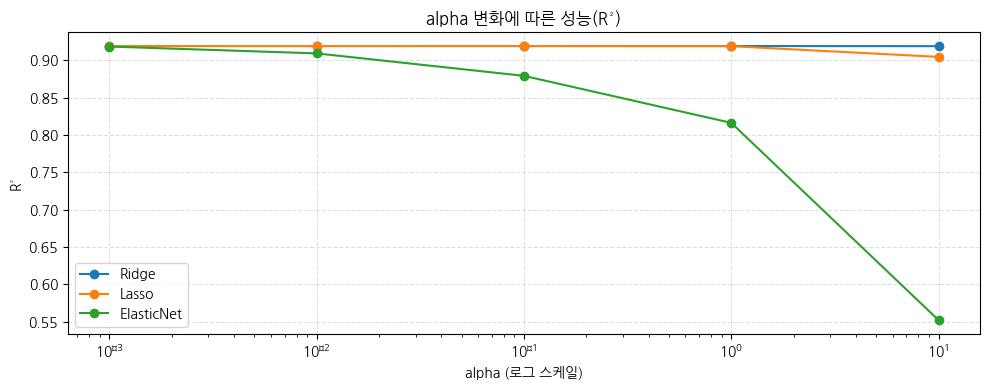

In [1]:
# =========================[0) 한글 폰트 설정]=========================
import matplotlib.pyplot as plt
import platform

# 운영체제별 기본 한글 폰트 지정
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# =========================[1) 라이브러리 불러오기]=========================
import warnings; warnings.filterwarnings('ignore')  # 경고 감추기(선택)
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================[2) 데이터 수집]=========================
# seaborn의 'diamonds' (다이아몬드 가격 데이터) 불러오기
print("▶ 데이터 로드: seaborn 'diamonds'")
diamonds = sns.load_dataset('diamonds')   # 최초 1회 인터넷에서 받아 캐시됨
print("   - shape:", diamonds.shape)       # (행, 열)

# =========================[3) 타깃/특성 분리]=========================
# 목표(y): price, 입력(X): 나머지
y = diamonds['price']
X = diamonds.drop('price', axis=1)

# =========================[4) 파이프라인을 위한 전처리 정의]=========================
# 범주형(문자형)과 수치형(숫자형) 컬럼 분리
categorical_features = ['cut', 'color', 'clarity']
numerical_features   = ['carat', 'depth', 'table', 'x', 'y', 'z']

# ColumnTransformer로 열별 전처리 설정:
# - 수치형: StandardScaler (스케일 맞추기)
# - 범주형: OneHotEncoder (문자형을 0/1로 변환)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
    ],
    remainder='drop'   # 지정한 컬럼만 사용 (필요하면 'passthrough')
)

# =========================[5) 학습/테스트 분리]=========================
# 전체 데이터를 8:2로 나누고, 무작위 고정(random_state=42)로 재현성 확보
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"▶ 데이터 분할: train {X_train.shape}, test {X_test.shape}")

# =========================[6) 세 모델(Ridge/Lasso/ElasticNet) 파이프라인]=========================
# 동일한 전처리(preprocessor)를 각 모델과 결합해 공정 비교
pipe_ridge = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=1.0, random_state=42))     # L2 규제 (모두 조금씩 줄임)
])

pipe_lasso = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Lasso(alpha=0.1, random_state=42, max_iter=10000))  # L1 규제 (불필요 특성 0으로)
])

pipe_enet = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000))  # L1+L2 혼합
])

models = {
    'Ridge': pipe_ridge,
    'Lasso': pipe_lasso,
    'ElasticNet': pipe_enet
}

# =========================[7) 학습 → 예측 → 평가 (MSE/RMSE/MAE/R2)]=========================
def eval_reg(y_true, y_pred):
    """회귀 지표 4종 계산 함수"""
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

print("▶ 모델 학습 & 평가 진행")
results = []
pred_store = {}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)             # 파이프라인 한 방에: 전처리 + 모델 학습
    y_pred = pipe.predict(X_test)          # 예측
    mse, rmse, mae, r2 = eval_reg(y_test, y_pred)
    results.append([name, mse, rmse, mae, r2])
    pred_store[name] = (pipe, y_pred)
    print(f"   - {name:10s} | MSE: {mse:,.2f} | RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.4f}")

df_results = pd.DataFrame(results, columns=['Model','MSE','RMSE','MAE','R2']).sort_values('R2', ascending=False)
print("\n▶ 성능 요약표")
display(df_results)

# =========================[8) 성능 막대그래프 (R² / MSE)]=========================
plt.figure(figsize=(9,4))
plt.bar(df_results['Model'], df_results['R2'])
plt.title("모델별 R²(결정계수) 비교")
plt.ylabel("R² (높을수록 좋음)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.bar(df_results['Model'], df_results['MSE'])
plt.title("모델별 MSE(평균제곱오차) 비교")
plt.ylabel("MSE (낮을수록 좋음)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# =========================[9) Lasso 계수(가중치) 확인: 0이 되는지 체크]=========================
# 주의: 파이프라인 내부 모델의 계수를 보려면, 학습 후에 내부 스텝에서 꺼내야 함
#       (전처리로 원-핫이 늘어난 '학습 후 특성 수' 기준 계수임)
lasso_pipe, _ = pred_store['Lasso']
lasso_est = lasso_pipe.named_steps['model']                 # 최종 모델 (Lasso)
ohe = lasso_pipe.named_steps['preprocess'].named_transformers_['cat']  # 원-핫 인코더
ohe_names = list(ohe.get_feature_names_out(categorical_features))      # 원-핫으로 늘어난 범주형 이름
all_feature_names = numerical_features + ohe_names                     # 최종 특성 이름(수치 + 원핫)

coef = lasso_est.coef_
# 특성 수와 계수 수가 일치하지 않으면(드물지만), 이름 없이 인덱스로 표시
if len(coef) == len(all_feature_names):
    coef_df = pd.DataFrame({'feature': all_feature_names, 'coef': coef})
else:
    coef_df = pd.DataFrame({'feature': [f'f{i}' for i in range(len(coef))], 'coef': coef})

# 0이 된 계수 개수 출력(라쏘의 변수 선택 효과)
num_zero = (coef_df['coef'] == 0).sum()
print(f"\n▶ Lasso에서 0이 된 계수 개수: {num_zero}/{coef_df.shape[0]}")

# 절댓값 큰 상위 15개만 시각화(양/음 영향이 큰 특성들)
top15 = coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index).head(15)
plt.figure(figsize=(10,6))
plt.barh(top15['feature'][::-1], top15['coef'][::-1])
plt.title("Lasso 계수 상위 15 (절댓값 기준)")
plt.xlabel("계수(가중치)")
plt.tight_layout()
plt.show()

# =========================[10) 선택: α(규제 강도) 미니 스윕]=========================
# 각 모델의 alpha를 몇 개 값으로 바꿔가며 R² 변화를 확인 (속도 빠름)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

def sweep_alpha(model_cls, name, **kwargs):
    r2_list = []
    for a in alphas:
        pipe = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('model', model_cls(alpha=a, **kwargs))
        ])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)
        r2_list.append(r2_score(y_test, pred))
    return r2_list

r2_ridge = sweep_alpha(Ridge, 'Ridge', random_state=42)
r2_lasso = sweep_alpha(Lasso, 'Lasso', random_state=42, max_iter=10000)
r2_enet  = sweep_alpha(ElasticNet, 'ElasticNet', random_state=42, l1_ratio=0.5, max_iter=10000)

plt.figure(figsize=(10,4))
plt.plot(alphas, r2_ridge, marker='o', label='Ridge')
plt.plot(alphas, r2_lasso, marker='o', label='Lasso')
plt.plot(alphas, r2_enet,  marker='o', label='ElasticNet')
plt.xscale('log')  # 알파 범위를 넓게 보려면 로그 스케일이 편함
plt.xlabel("alpha (로그 스케일)")
plt.ylabel("R²")
plt.title("alpha 변화에 따른 성능(R²)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
